In [165]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import gmaps 
import gmaps.datasets 
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')
from sorted_months_weekdays import Month_Sorted_Month

# Arima class
from statsmodels.compat.pandas import Appender

import warnings

from statsmodels.tools.data import _is_using_pandas
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.statespace.kalman_filter import MEMORY_CONSERVE
from statsmodels.tsa.statespace.tools import diff
import statsmodels.base.wrapper as wrap

from statsmodels.tsa.arima.estimators.yule_walker import yule_walker
from statsmodels.tsa.arima.estimators.burg import burg
from statsmodels.tsa.arima.estimators.hannan_rissanen import hannan_rissanen
from statsmodels.tsa.arima.estimators.innovations import (
    innovations, innovations_mle)
from statsmodels.tsa.arima.estimators.gls import gls as estimate_gls

from statsmodels.tsa.arima.specification import SARIMAXSpecification
import statsmodels.api
import statsmodels as sm
import statsmodels.api as sm


In [2]:
df = pd.read_csv('./data/GRU_Customer_Electric_Consumption.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291199 entries, 0 to 9291198
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Service Address  object 
 1   Service City     object 
 2   Month            object 
 3   Year             int64  
 4   Date             object 
 5   KWH Consumption  float64
 6   Latitude         float64
 7   Longitude        float64
 8   Location         object 
dtypes: float64(3), int64(1), object(5)
memory usage: 638.0+ MB


In [4]:
df.head()

,Service Address,Service City,Month,Year,Date,KWH Consumption,Latitude,Longitude,Location
0,8574 SW 26TH LN,GAINESVILLE,September,2019,09/30/2019,1813.0,29.628666,-82.433346,POINT (-82.433346 29.628666)
1,8901 SW 67TH PL,GAINESVILLE,October,2019,10/31/2019,1681.0,29.591773,-82.437221,POINT (-82.437221 29.591773)
2,8601 SW 31ST AVE,GAINESVILLE,October,2019,10/31/2019,8560.0,29.624492,-82.433521,POINT (-82.433521 29.624492)
3,5065 SE 8TH AVE,GAINESVILLE,September,2019,09/30/2019,1089.0,29.644607,-82.265500,POINT (-82.2655 29.644607)
4,4313 NW 65TH TER,GAINESVILLE,September,2019,09/30/2019,1277.0,29.694047,-82.412384,POINT (-82.412384 29.694047)


In [5]:
# sort rows in chronological order by year and month 
month_order = pd.Categorical([ 'January', 'February','March' ,'April' ,'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
              ordered=True)

df_month_sorted = df.sort_values(by=["Month", "Year"])
df_month_sorted.head()


,Service Address,Service City,Month,Year,Date,KWH Consumption,Latitude,Longitude,Location
186226,9 NW 99TH TER,GAINESVILLE,April,2012,04/30/2012,1863.0,29.652695,-82.448407,POINT (-82.448407 29.652695)
186251,8520 NW 2ND PL,GAINESVILLE,April,2012,04/30/2012,1013.0,29.654486,-82.433456,POINT (-82.433456 29.654486)
186297,650 QUEENS RD,GAINESVILLE,April,2012,04/30/2012,223.0,29.644202,-82.416514,POINT (-82.416514 29.644202)
186298,9725 SW 1ST PL,GAINESVILLE,April,2012,04/30/2012,980.0,29.651200,-82.446913,POINT (-82.446913 29.6512)
186307,9320 SW 1ST PL,GAINESVILLE,April,2012,04/30/2012,410.0,29.651158,-82.441782,POINT (-82.441782 29.651158)


In [61]:
population_df = pd.read_csv('./data/population.csv')
pd.set_option('display.max_rows', 500)
population_df

,Date,Month,Year,Population
0,2012-01-31,January,2012,126038
1,2012-02-28,February,2012,126038
2,2012-03-31,March,2012,126038
3,2012-04-30,April,2012,126038
4,2012-05-31,May,2012,126038
5,2012-06-30,June,2012,126038
6,2012-07-31,July,2012,126038
7,2012-08-31,August,2012,126038
8,2012-09-30,September,2012,126038
9,2012-10-31,October,2012,126038


In [62]:
# Set Date column as index in population dataframe
population_df.set_index('Date')
pd.set_option('display.max_rows', 500)
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        106 non-null    object
 1   Month       106 non-null    object
 2   Year        106 non-null    int64 
 3   Population  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
#map_df = gpd.read_file('./data/GIS_cgbound/cgbound.shp')

In [ ]:
#map_df.head()

In [ ]:
#map_df.plot()

In [63]:
# create dataframe with average electricity use / month 
# slice electrical consumption, Year, Month and Date columns
electricity_df = df_month_sorted[['Year', 'Month', 'Date', 'KWH Consumption']]
electricity_df

,Year,Month,Date,KWH Consumption
186226,2012,April,04/30/2012,1863.0
186251,2012,April,04/30/2012,1013.0
186297,2012,April,04/30/2012,223.0
186298,2012,April,04/30/2012,980.0
186307,2012,April,04/30/2012,410.0
...,...,...,...,...
844246,2020,September,09/30/2020,133.0
844247,2020,September,09/30/2020,248.0
844248,2020,September,09/30/2020,191.0
844249,2020,September,09/30/2020,268.0


In [64]:
electricity_df['Date'] = pd.to_datetime(df['Date'])
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9291199 entries, 186226 to 844250
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Year             int64         
 1   Month            object        
 2   Date             datetime64[ns]
 3   KWH Consumption  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 354.4+ MB


/Users/katiejohnson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# Set Date column as index in electricity dataframe
electricity_df.set_index('Date')
pd.set_option('display.max_rows', 500)
electricity_df

,Year,Month,Date,KWH Consumption
186226,2012,April,2012-04-30,1863.0
186251,2012,April,2012-04-30,1013.0
186297,2012,April,2012-04-30,223.0
186298,2012,April,2012-04-30,980.0
186307,2012,April,2012-04-30,410.0
...,...,...,...,...
844246,2020,September,2020-09-30,133.0
844247,2020,September,2020-09-30,248.0
844248,2020,September,2020-09-30,191.0
844249,2020,September,2020-09-30,268.0


In [77]:
grouped_e_df = electricity_df.groupby('Date', dropna=True, sort=True).mean()
pd.set_option('display.max_rows', 500)
grouped_e_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2012-01-31 to 2020-10-31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             106 non-null    int64  
 1   KWH Consumption  106 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [135]:
# join the popluation dataframe with the average monthly dataframe
pop_e_df = grouped_e_df.join(population_df.set_index('Date'), how='left', lsuffix='_left', rsuffix='_right')
pop_e_df = pop_e_df.drop('Year_right', axis=1)
pop_e_df = pop_e_df.rename(columns={'Year_left': 'Year'})

In [136]:
# add column with electricity use per capita 
pop_e_df['avg_kwh_capita'] = pop_e_df['KWH Consumption'] / pop_e_df['Population']
pop_e_df

,Year,KWH Consumption,Month,Population,avg_kwh_capita
Date,,,,,
2012-01-31,2012,1435.303721,January,126038,0.011388
2012-02-28,2012,1370.738358,February,126038,0.010876
2012-03-31,2012,1302.423668,March,126038,0.010334
2012-04-30,2012,1466.194996,April,126038,0.011633
2012-05-31,2012,1543.803755,May,126038,0.012249
2012-06-30,2012,1819.750531,June,126038,0.014438
2012-07-31,2012,1895.256318,July,126038,0.015037
2012-08-31,2012,1925.443757,August,126038,0.015277
2012-09-30,2012,1939.773506,September,126038,0.015390


Text(0.5, 1.0, 'Gainesville, FL KWH per Capita 2012-2020')

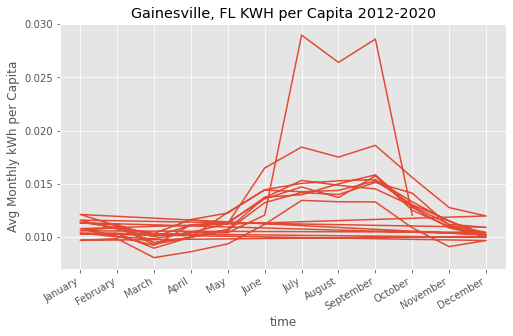

In [144]:

y = pop_e_df['avg_kwh_capita']

# ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(8, 5))
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right', which='major')
plt.plot(x, y)
ax.set_xlabel('time')
ax.set_ylabel('Avg Monthly kWh per Capita')
ax.set_title('Gainesville, FL KWH per Capita 2012-2020')


FileNotFoundError: [Errno 2] No such file or directory: 'images/kWh_per_capita.png'

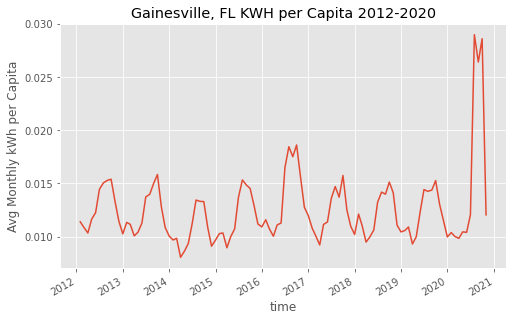

In [171]:
x = pop_e_df.index
y = pop_e_df['avg_kwh_capita']

# ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(8, 5))
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right', which='major')
plt.plot(x, y)
ax.set_xlabel('time')
ax.set_ylabel('Avg Monthly kWh per Capita')
ax.set_title('Gainesville, FL KWH per Capita 2012-2020')
plt.savefig('images/kWh_per_capita.png')

In [167]:
mod = sm.tsa.ARIMA(pop_e_df['avg_kwh_capita'], order=(1, 0, 0))
res = mod.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:         avg_kwh_capita   No. Observations:                  106
Model:                     ARMA(1, 0)   Log Likelihood                 483.742
Method:                       css-mle   S.D. of innovations              0.003
Date:                Mon, 30 Nov 2020   AIC                           -961.483
Time:                        16:58:12   BIC                           -953.493
Sample:                             0   HQIC                          -958.245
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0125      0.001     16.861      0.000       0.011       0.014
ar.L1.avg_kwh_capita     0.6768      0.070      9.647      0.000       0.539       0.814
            

/Users/katiejohnson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/katiejohnson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provid